# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
It consists of one flat file (CSV file) that we will read using pandas read_csv() function and start to understand the data inside it and build our analysis steps accordingly.
Through this analysis we will be able to answer the following questions.


## Question(s) for Analysis

- **Which months are most popular for a movie production company to release a movie in?**
- **How does the budget spent on a movie affect its profit?**
- **If a movie is very popular does that mean it will produce high profit?** 
- **What is the correlation between the average movie rating and its popularity?** 
- **What is the most popular movie runtime?**
- **How did the cinematic industry magnitude change over the years?**
- **Statstical Findings:**
    - Which movie had the highest revenue, budget, rating in the last 5 years?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sas
%matplotlib inline
sas.set_style("dark")


## Data Wrangling


In [2]:
# Loading our data 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#call the No. of rows and columns in the DataFrame and columns names
print(df.shape)
df.columns

(10866, 21)


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
#Call the count of values in each column to determine the columns with missing values and columns datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**From the .info() method output, we find the following**

    -We have two ID columns one of them has missing values so this is the one we will drop.
    -The following columns won't be of value in our analysis so we can drop them, ['imdb_id','cast','homepage','tagline','keywords','overview']
    -These columns have missing values 
     production_companies --->large number and no way to fill the NaN so we drop the column as we can't analyze it.
     genres------------------>The missing values are not too many so we can drop the empty rows when we analyze this column
     director---------------->The missing values are not too many so we can drop the empty rows when we analyze this column   
    

In [5]:
df.drop(columns =['imdb_id','cast','homepage','tagline','keywords','overview','production_companies'],  axis = 1, inplace=True)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [56]:
#Detect duplicated rows and remove them form the DataFrame 
print(sum(df.duplicated()))
df.drop_duplicates(inplace = True)
sum(df.duplicated())

1


0

In [57]:
#Change the datatype of the releas_year column from int to str
df['release_year'] = df['release_year'].astype(str)
df['release_year'].dtypes

dtype('O')

In [58]:
#Detect the movie original_title duplicated values
df['original_title'].value_counts()

Hamlet                   4
Life                     3
The Three Musketeers     3
Alice in Wonderland      3
Julia                    3
                        ..
Life as a House          1
Passion                  1
The Fountain             1
Give 'em Hell, Malone    1
The Guvnors              1
Name: original_title, Length: 10571, dtype: int64

In [59]:
#Create a new Column with the movie title, the release year and the director
df['movie_title']= df['original_title']+"("+df['release_year']+")"+" by "+df['director']
df['movie_title'].value_counts()

By the Sea(2015) by Angelina Jolie                                                                 1
The Dentist(1996) by Brian Yuzna                                                                   1
Bitter Moon(1992) by Roman Polanski                                                                1
Intimacy(2001) by Patrice ChÃ©reau                                                                 1
2 Days in the Valley(1996) by John Herzfeld                                                        1
                                                                                                  ..
Horsehead(2014) by Romain Basset                                                                   1
Virgin Territory(2007) by David Leland                                                             1
The Matrix Revisited(2001) by Josh Oreck                                                           1
Fly Me to the Moon(2008) by Ben Stassen                                                    

In [60]:
df['release_year']=df['release_year'].astype(int)
df['release_year'].dtypes

dtype('int32')

In [61]:
#Filtering the dataframe to exclude budget values that equals zero and calculate median value
df_bud=df.query('budget !=0')
med = df_bud['budget'].median()
print(med)
#This function with replace all the zero values with the calculated median of the available budgets
def replace_0(x):
    return x + med

df['budget']= df['budget'].apply(replace_0)
df['budget'].value_counts()

17000000.0


17000000.0     5696
37000000.0      190
32000000.0      183
42000000.0      178
27000000.0      176
               ... 
22400000.0        1
22952000.0        1
18746964.0        1
66900000.0        1
262000000.0       1
Name: budget, Length: 557, dtype: int64

In [62]:
#Filtering the dataframe to exclude revenue values that equals zero and calculate median value
df_rev=df.query('revenue !=0')
med = df_rev['revenue'].median()
print(med)
#Run the function on the revenue column to replace zero values with the calculated median
df['revenue']= df['revenue'].apply(replace_0)
df['revenue'].value_counts()

31853080.0


3.185308e+07    6016
4.385308e+07      10
4.185308e+07       8
4.285308e+07       7
3.685308e+07       6
                ... 
9.861589e+08       1
3.237775e+07       1
1.112894e+09       1
1.275267e+08       1
1.325072e+08       1
Name: revenue, Length: 4702, dtype: int64

**Now that the revenue and budget don't contain zero values we can calculate the profit and xcreate its column**

In [63]:
#Profit is calculated by substracting the budget for the revenue of a movie
df['profit'] = df['revenue'] - df['budget']
df['profit'].value_counts()

 14853080.0    4705
 4853080.0       69
 9853080.0       64
-5146920.0       45
 6853080.0       44
               ... 
 33229372.0       1
 96576438.0       1
-13580283.0       1
 10046142.0       1
 36198080.0       1
Name: profit, Length: 5007, dtype: int64

In [64]:
#examine the statistical values of the  dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,3.162429e+07,7.167998e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,4.005569e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,9.659103e+07
min,5.000000,0.000065,1.700000e+07,3.185308e+07,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-3.990594e+08
25%,10596.000000,0.207575,1.700000e+07,3.185308e+07,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,1.485308e+07
50%,20662.000000,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,1.485308e+07
75%,75612.000000,0.713857,3.200000e+07,5.585308e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,2.394553e+07
max,417859.000000,32.985763,4.420000e+08,2.813359e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.559359e+09


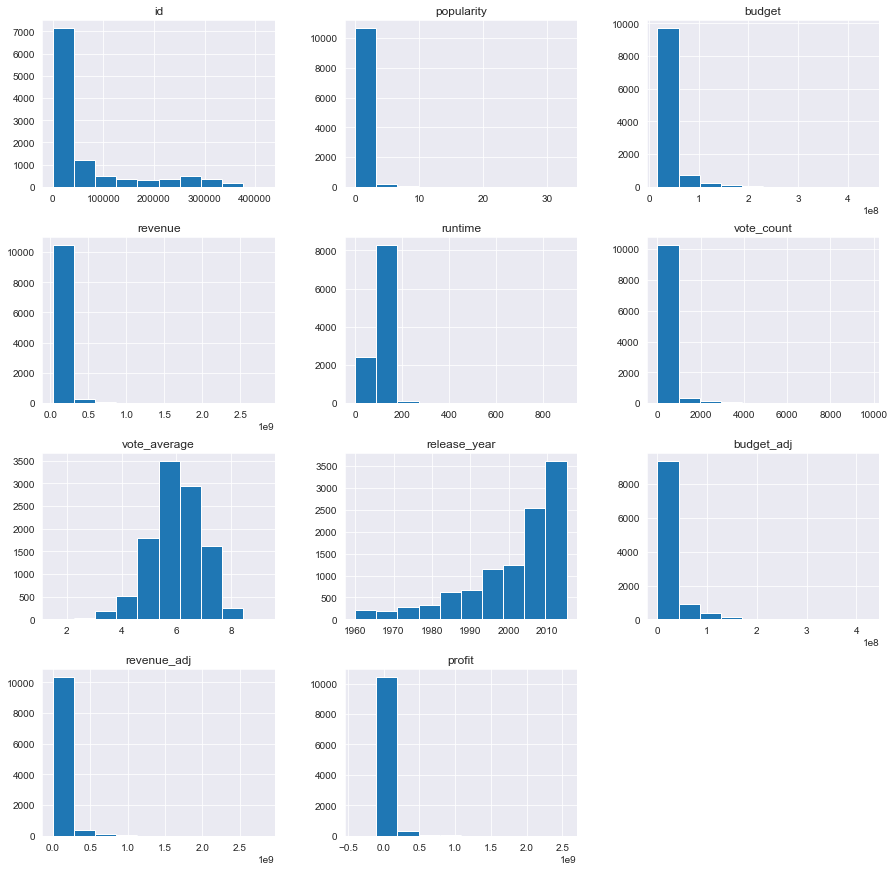

In [65]:
df.hist(figsize = (15,15));

In [66]:
#Create a new Column for month of release as data type int
df['month'] = df.release_date.str.split("/",expand=True)[0].astype(int)
df['month'].value_counts()

9     1331
10    1153
12     985
1      919
8      918
6      827
3      822
11     814
5      809
7      799
4      797
2      691
Name: month, dtype: int64

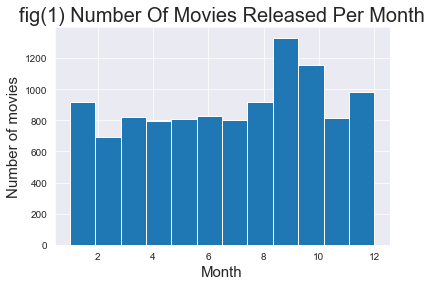

In [67]:
df['month'].hist(bins = 12)
plt.title('fig(1) Number Of Movies Released Per Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Number of movies', fontsize = 15);

**By plotting the months bar plot, It appears that movie releases are more occuring in the months of September, October, December and January respectively.** 

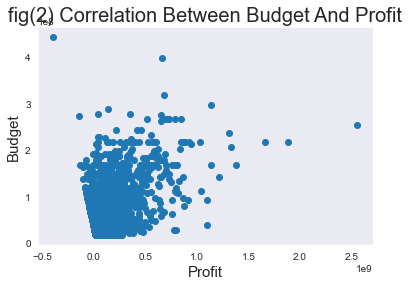

In [68]:
#Plot the correlation between budjet and profit
plt.scatter(df['profit'],df['budget'])
plt.title('fig(2) Correlation Between Budget And Profit', fontsize = 20)
plt.xlabel('Profit', fontsize = 15)
plt.ylabel('Budget', fontsize = 15);

**From this plot we find that the increase in budget most of the time result in an increase in profit**

In [69]:
#remove popularity outliars for better visualizations and analysis
df_pop=df.query('popularity < 20')
df_pop.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,month
count,10862.000000,10862.000000,1.086200e+04,1.086200e+04,10862.000000,10862.000000,10862.000000,10862.000000,1.086200e+04,1.086200e+04,1.086200e+04,10862.000000
mean,66050.642976,0.638674,3.158552e+07,7.145955e+07,102.061959,215.779967,5.974673,2001.318173,1.751534e+07,5.117022e+07,3.987404e+07,6.827472
std,92140.198156,0.882601,3.083016e+07,1.159869e+08,31.379285,567.375372,0.934989,12.813107,3.424901e+07,1.439697e+08,9.563738e+07,3.441953
min,5.000000,0.000065,1.700000e+07,3.185308e+07,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-3.990594e+08,1.000000
25%,10593.750000,0.207549,1.700000e+07,3.185308e+07,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,1.485308e+07,4.000000
50%,20652.500000,0.383818,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,1.485308e+07,7.000000
75%,75556.750000,0.713181,3.200000e+07,5.582135e+07,111.000000,145.000000,6.600000,2011.000000,2.080566e+07,3.367755e+07,2.389219e+07,10.000000
max,417859.000000,14.311205,4.420000e+08,2.813359e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.559359e+09,12.000000


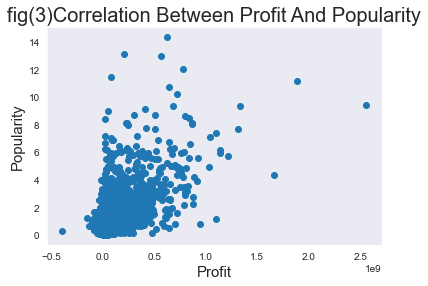

In [70]:
#Plot the correlation between profit and popularity
plt.scatter(df_pop['profit'],df_pop['popularity'])
plt.title('fig(3)Correlation Between Profit And Popularity', fontsize = 20)
plt.xlabel('Profit', fontsize = 15)
plt.ylabel('Popularity', fontsize = 15);

**From this plot we find that the more the movie is popular the more profit it generates which is logical**

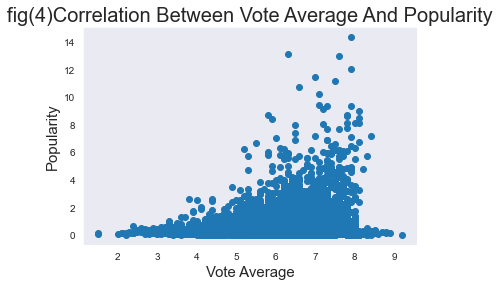

In [71]:
#Plot the correlation between vote average and popularity
plt.scatter(df_pop['vote_average'],df_pop['popularity'])
plt.title('fig(4)Correlation Between Vote Average And Popularity', fontsize = 20)
plt.xlabel('Vote Average', fontsize = 15)
plt.ylabel('Popularity', fontsize = 15);

**Looks like popular movies are rated with higher vote average**

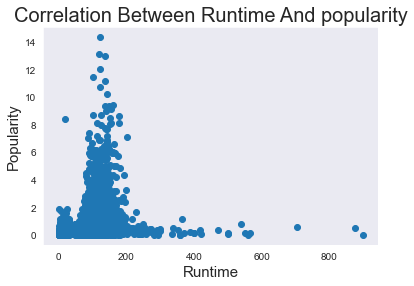

In [77]:
#Plot the correlation between popularity and movie runtime
plt.scatter(df_pop['runtime'],df_pop['popularity'])
plt.title('Correlation Between Runtime And popularity', fontsize = 20)
plt.xlabel('Runtime', fontsize = 15)
plt.ylabel('Popularity', fontsize = 15);

**We can visualize this correlation in a cleaner more clear way as a bar plot through binning**

In [73]:
#creating a runtime ranges 
range_edges = [0,60,120,180,900]
range_labels = ['0-1hr','1-2hrs','2-3hrs','>3hrs']
df_pop['runtime_range']=pd.cut(df_pop['runtime'], range_edges, labels=range_labels)
df_pop['runtime_range'].value_counts()

<ipython-input-73-3cccbaccf58e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop['runtime_range']=pd.cut(df_pop['runtime'], range_edges, labels=range_labels)


1-2hrs    8942
2-3hrs    1450
0-1hr      311
>3hrs      128
Name: runtime_range, dtype: int64

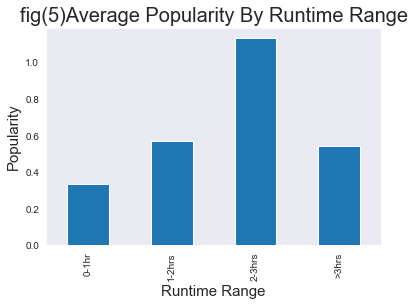

In [78]:
run_range_pop = df_pop.groupby('runtime_range')['popularity'].mean().plot(kind = 'bar')
plt.title('fig(5)Average Popularity By Runtime Range', fontsize = 20)
plt.xlabel('Runtime Range', fontsize = 15)
plt.ylabel('Popularity', fontsize = 15);

**This plot shows that the most popular movie runtime is 2:3 hours**

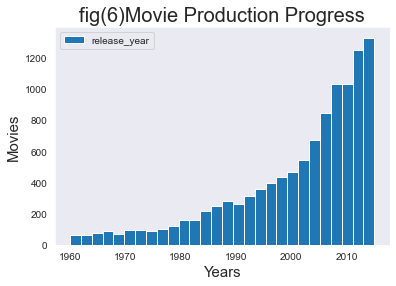

In [85]:
df.plot(y = 'release_year', bins = 28, kind = 'hist')
plt.title('fig(6)Movie Production Progress', fontsize = 20)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Movies',fontsize = 15);

**This histogram shows the increase in the size of the cinematic production over the years**

In [76]:
#To get the movie with the highest metrics
def movie_max(col):
    return df.loc[df[col]== df[col].max()]
print('Movie with highest profit:')
print(movie_max('profit')['movie_title'])
print("-"*50)
print('Movie with highest budget:')
print(movie_max('budget')['movie_title'])
print("-"*50)
print('Movie with highest average votes:')
print(movie_max('vote_average')['movie_title'])
print("-"*50)

Movie with highest profit:
1386    Avatar(2009) by James Cameron
Name: movie_title, dtype: object
--------------------------------------------------
Movie with highest budget:
2244    The Warrior's Way(2010) by Sngmoo Lee
Name: movie_title, dtype: object
--------------------------------------------------
Movie with highest average votes:
3894    The Story of Film: An Odyssey(2011) by Mark Co...
Name: movie_title, dtype: object
--------------------------------------------------


**Movie with highest profit:
Avatar(2009) by James Cameron**

**Movie with highest budget:
The Warrior's Way(2010) by Sngmoo Lee**

**Movie with highest average votes:
The Story of Film: An Odyssey(2011) by Mark Co...**

## Conclusion:
- Q: **Which months are most popular for a movie production company to release a movie in?**
      -A: Movie releases are more occuring in the months of September, October, December and January respectively as per fig(1)
- Q: **How does the budget spent on a movie affect its profit?**
      -A: The increase in budget most of the time result in an increase in profit as per fig(2)
- Q: **If a movie is very popular does that mean it will produce high profit?**
      -A: The more the movie is popular the more profit it generates which is logicalas per fig(3)
- Q: **What is the correlation between the average movie rating and its popularity?** 
      -A: Popular movies are rated with higher vote average as per fig(4)
- Q: **What is the most popular movie runtime?**
      -A: The most popular movie runtime is 2:3 hours as per fig(5)
- Q: **How did the cinematic industry magnitude change over the years?**
      -A: Fig(6) histogram shows the increase in the size of the cinematic production over the years
-Q:**Which movie had the highest revenue, budget, rating in the last 5 years?**
-A:Movie with highest **profit**: **(Avatar(2009) by James Cameron)**

Movie with highest **budget**: **(The Warrior's Way(2010) by Sngmoo Lee)**

Movie with highest **average votes**: **(The Story of Film: An Odyssey(2011) by Mark Co...)**


## Data Limitations:

- The revenue and the budget columns had a large number of zero values which I had to replace with the median with the valid values for each column to carry out the analysis
- The production company column had many missing values which would've givven misleading analysis and there'sno way to fill this data effectively 